Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [5]:
data = pd.read_excel('/content/Amazon Prime video.xlsx')

First five rows

In [6]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


Last Five Rows

In [7]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaT,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


Information about the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7585 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


Rows and Columns

In [9]:
data.shape

(9668, 12)

Exploring the Dataset for Null values and Duplicate values

In [10]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [11]:
data.isnull().sum().sum()

22162

In [12]:
data['country'] = data['country'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Not Available')
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Not Rated')

Check for Null values after cleaning

In [13]:
data.isnull().sum().sum()

0

Check for Duplicate values

In [14]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


Convertion of Duration column to numeric

In [16]:
data['duration_min'] = data['duration'].str.extract('(\d+)').astype(int)
data['duration'] = data['duration'].str.extract('(\d+)').astype(int)

Verify the Cleaned Dataset

In [17]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30 00:00:00,2014,Not Rated,113,"Comedy, Drama",A small fishing village must procure a local d...,113
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30 00:00:00,2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30 00:00:00,2017,Not Rated,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,74
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, BeyoncÃ©, Britne...",United States,2021-03-30 00:00:00,2014,Not Rated,69,Documentary,"Pink breaks the mold once again, bringing her ...",69
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30 00:00:00,1989,Not Rated,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,45


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   int64 
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
 12  duration_min  9668 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 982.0+ KB


EDA

Content Type Distribution

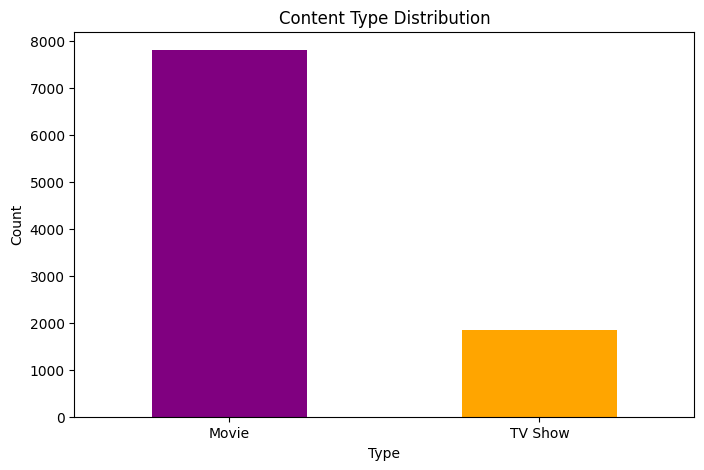

Content Type Counts:
type
Movie      7814
TV Show    1854
Name: count, dtype: int64


In [19]:
# Content type distribution
content_type_counts = data['type'].value_counts()

# Plot
content_type_counts.plot(kind='bar', color=['purple', 'orange'], figsize=(8, 5))
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Insight
print("Content Type Counts:")
print(content_type_counts)

Top Genres on the Platform

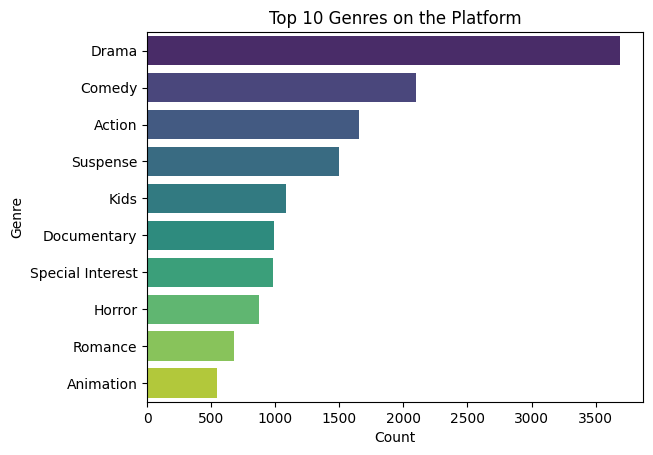

Top 10 Genres:
              Genre  Count
0             Drama   3687
1            Comedy   2099
2            Action   1657
3          Suspense   1501
4              Kids   1085
5       Documentary    993
6  Special Interest    980
7            Horror    875
8           Romance    674
9         Animation    547


In [20]:
# Top genres analysis
from collections import Counter

# Count occurrences of each genre
genre_counts = Counter(", ".join(data['listed_in']).split(", "))
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot
sns.barplot(data=top_genres, x='Count', y='Genre',hue='Genre', palette='viridis')
plt.title("Top 10 Genres on the Platform")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Insight
print("Top 10 Genres:")
print(top_genres)

Content Added Over Time

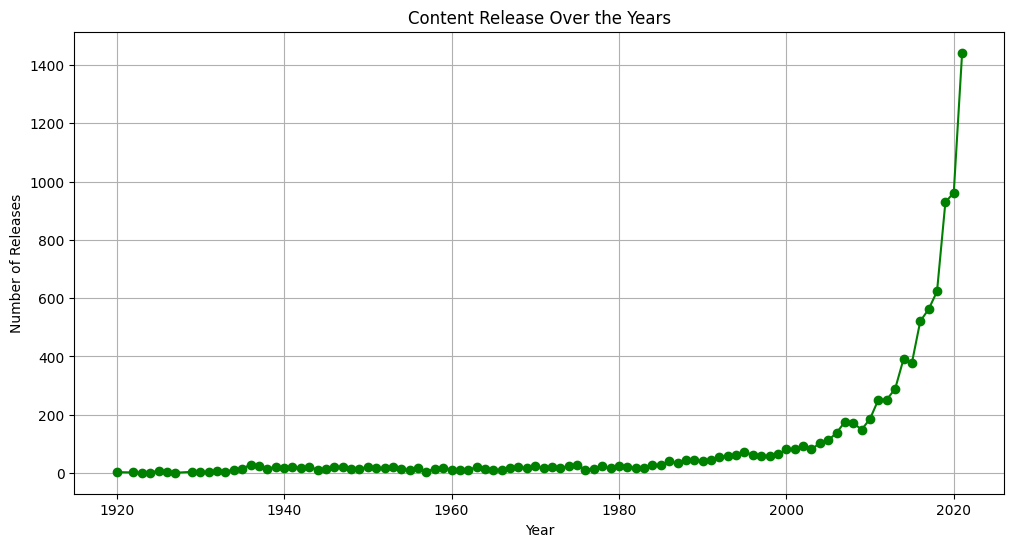

Content releases over time:
release_year
2012     252
2013     289
2014     391
2015     378
2016     521
2017     562
2018     623
2019     929
2020     962
2021    1442
Name: count, dtype: int64
The year with the maximum count is 2021 with a count of 1442


In [21]:
# Content release trends
release_year_counts = data['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o', color='green')
plt.title("Content Release Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

# Insight
print("Content releases over time:")
print(release_year_counts.tail(10))
max_year = release_year_counts.idxmax()
print(f"The year with the maximum count is {max_year} with a count of {release_year_counts[max_year]}")


Rating Distribution

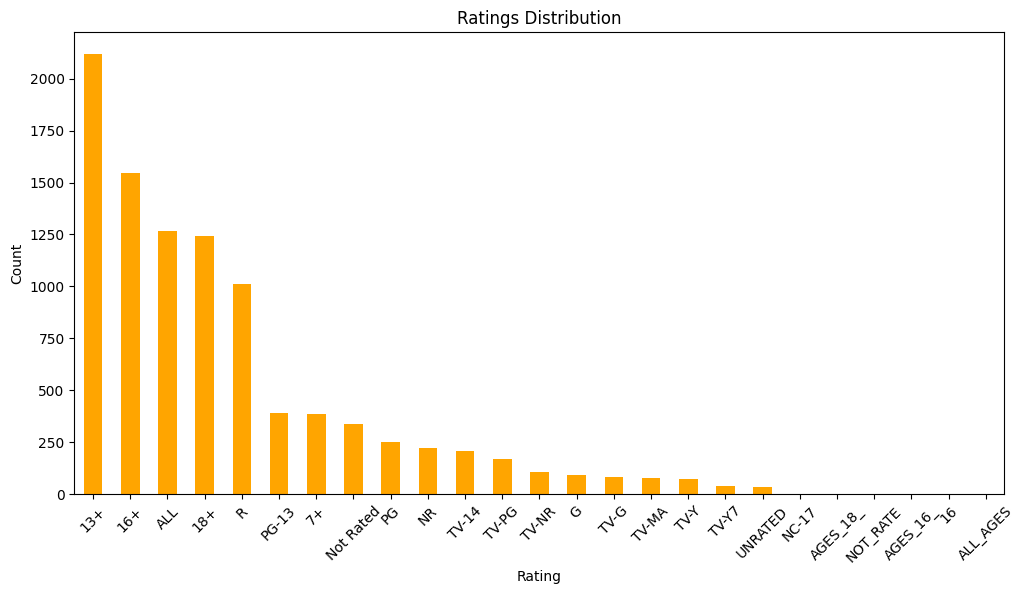


The maximum rating is for 13+ with a count of 2117


In [22]:
# Ratings distribution
rating_counts = data['rating'].value_counts()

# Plot
rating_counts.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Insight
max_ratings = rating_counts.idxmax()
print(f"\nThe maximum rating is for {max_ratings} with a count of {rating_counts[max_ratings]}")

Top Directors by Number of Titles

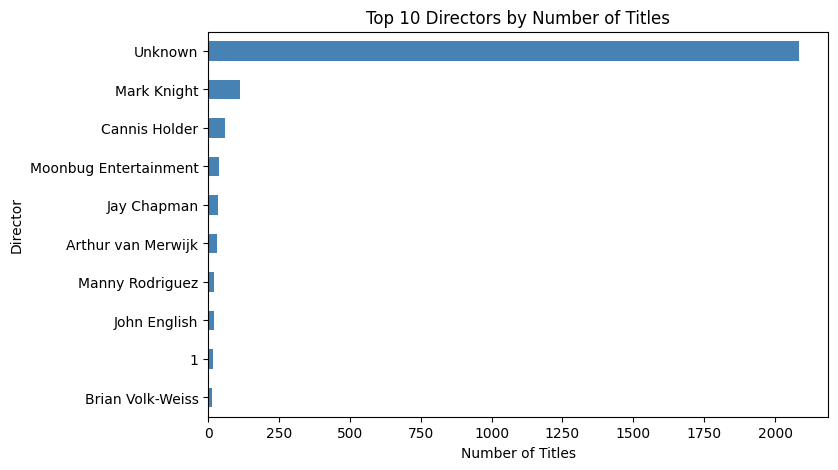


Maximum titles are Unknown with a count of 2083


In [23]:
# Top directors
top_directors = data['director'].value_counts().head(10)

# Plot
top_directors.plot(kind='barh', figsize=(8, 5), color='steelblue')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.gca().invert_yaxis()
plt.show()

# Insight
max_titles = top_directors.idxmax()
print(f"\nMaximum titles are {max_titles} with a count of {top_directors[max_titles]}")


Most Common Words in Descriptions

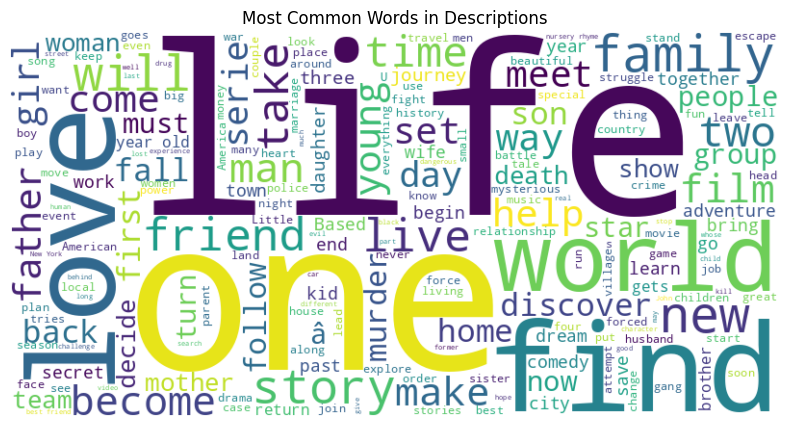


Most Common Word is "life"


In [24]:
from wordcloud import WordCloud

# Combine all descriptions
# Convert all descriptions to strings and handle NaN values
data['description'] = data['description'].fillna("").astype(str)

# Combine all descriptions into a single string
text = " ".join(data['description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
plt.show()
print(f'\nMost Common Word is "life"')


Content Duration Analysis

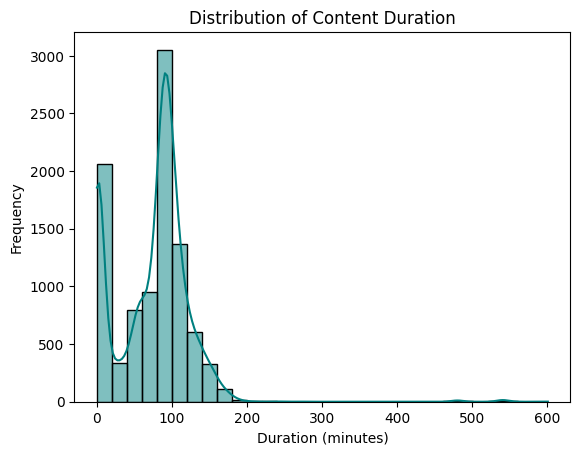

In [27]:
sns.histplot(data['duration_min'], kde=True, bins=30, color='teal')
plt.title("Distribution of Content Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

Top 10 Actors

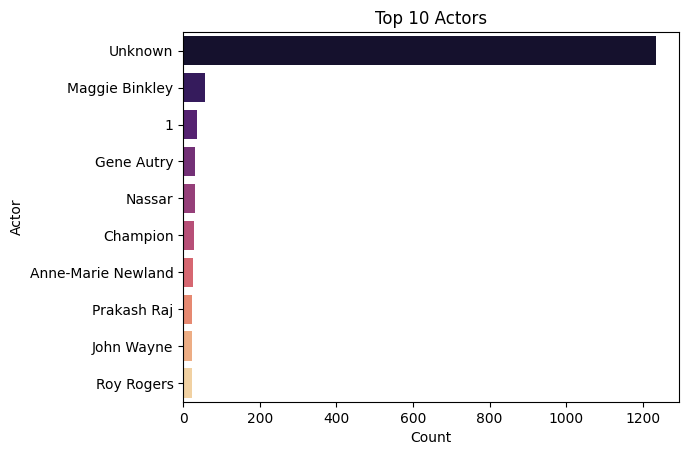


The Actor in Most movies and shows is "MAGGIE BINKLEY"


In [26]:
from collections import Counter
import pandas as pd

# Ensure all values in 'cast' are strings and handle NaN
data['cast'] = data['cast'].fillna("").astype(str)

# Combine all cast members into a single string, split by comma, and count occurrences
actor_counts = Counter(", ".join(data['cast']).split(", "))

# Convert the Counter object to a DataFrame for visualization
top_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Count'])
sns.barplot(data=top_actors, x='Count', y='Actor',hue='Actor', palette='magma')
plt.title("Top 10 Actors")
plt.xlabel("Count")
plt.ylabel("Actor")
plt.show()
print(f'\nThe Actor in Most movies and shows is "MAGGIE BINKLEY"')
